In [ ]:
# setup
!pip install -q imbalanced-learn scikit-learn pandas matplotlib seaborn

import os
import random
import numpy as np
import pandas as pd

# Reproducibility
SEED = 42
random.seed(SEED)
np.random.seed(SEED)

print("Setup done. Seed =", SEED)


Setup done. Seed = 42


In [ ]:
# interactive upload (runs in Colab)
from google.colab import files
uploaded = files.upload()  # choose creditcard.csv from your machine

# If uploaded, find the filename and load
fn = list(uploaded.keys())[0]
print("Uploaded:", fn)
df = pd.read_csv(fn)
print("Loaded", fn, "shape:", df.shape)


Saving creditcard.csv to creditcard (1).csv
Uploaded: creditcard (1).csv
Loaded creditcard (1).csv shape: (284807, 31)


In [ ]:
# load from known path (use if you've already placed file in runtime)
path = "/content/creditcard (1).csv"   # change if different
assert os.path.exists(path), f"{path} not found. Use upload or change path."
df = pd.read_csv(path)
print("Loaded", path, "shape:", df.shape)

Loaded /content/creditcard (1).csv shape: (284807, 31)


In [ ]:
#  quick EDA
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
print(df.shape)

(284807, 31)


In [ ]:
#  basic stats
print("Shape:", df.shape)
print("\nMissing values per column:\n", df.isnull().sum())
print("\nClass distribution:\n", df['Class'].value_counts(normalize=True).mul(100).round(4))


Shape: (284807, 31)

Missing values per column:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Class distribution:
 Class
0    99.8273
1     0.1727
Name: proportion, dtype: float64


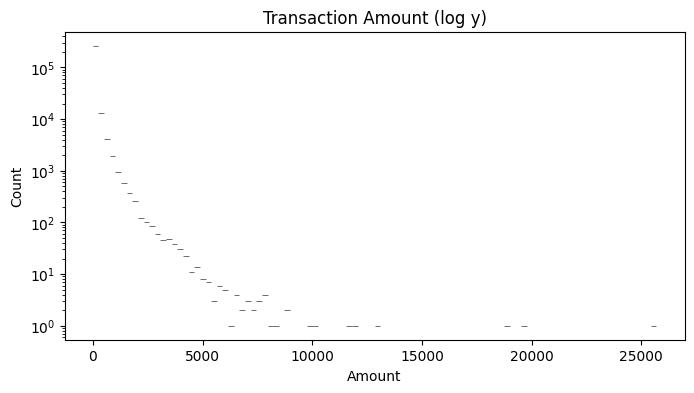

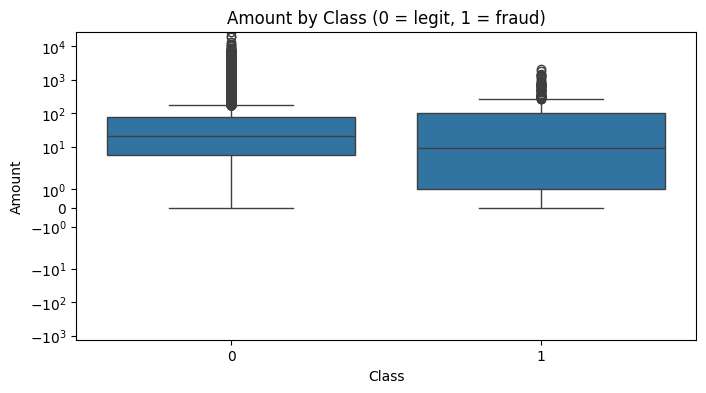

In [ ]:
#histograms and boxplot examples
import matplotlib.pyplot as plt
import seaborn as sns

# Amount distribution
plt.figure(figsize=(8,4))
sns.histplot(df['Amount'], bins=100, log_scale=(False, True))
plt.title('Transaction Amount (log y)')
plt.show()

# Boxplot for Amount by Class
plt.figure(figsize=(8,4))
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Amount by Class (0 = legit, 1 = fraud)')
plt.yscale('symlog')  # deal with outliers
plt.show()


In [ ]:
#  preprocessing (scaling)
from sklearn.preprocessing import StandardScaler

df_sc = df.copy()
scaler = StandardScaler()
df_sc['Amount_scaled'] = scaler.fit_transform(df_sc[['Amount']])
df_sc['Time_scaled'] = scaler.fit_transform(df_sc[['Time']])

# drop original if desired
df_sc = df_sc.drop(['Amount', 'Time'], axis=1)
df_sc.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Amount_scaled,Time_scaled
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


In [ ]:
#  split
from sklearn.model_selection import train_test_split

X = df_sc.drop('Class', axis=1)
y = df_sc['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=SEED
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)
print("Train class distribution:", y_train.value_counts(normalize=True).mul(100).round(4))


Train shape: (227845, 30) Test shape: (56962, 30)
Train class distribution: Class
0    99.8271
1     0.1729
Name: proportion, dtype: float64


In [ ]:
#SMOTE oversampling
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=SEED)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("After SMOTE:", y_train_res.value_counts())

After SMOTE: Class
0    227451
1    227451
Name: count, dtype: int64


In [ ]:
#  logistic regression baseline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

clf = LogisticRegression(max_iter=1000, random_state=SEED)
clf.fit(X_train_res, y_train_res)

y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]

print("Classification report (LogReg):\n", classification_report(y_test, y_pred, digits=4))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))


Classification report (LogReg):
               precision    recall  f1-score   support

           0     0.9999    0.9744    0.9869     56864
           1     0.0581    0.9184    0.1094        98

    accuracy                         0.9743     56962
   macro avg     0.5290    0.9464    0.5481     56962
weighted avg     0.9982    0.9743    0.9854     56962

ROC AUC: 0.9698482164390798
Confusion matrix:
 [[55406  1458]
 [    8    90]]


In [ ]:
# Optional: XGBoost
!pip install -q xgboost
from xgboost import XGBClassifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=SEED)
xgb.fit(X_train_res, y_train_res)
print("XGB ROC AUC:", roc_auc_score(y_test, xgb.predict_proba(X_test)[:,1]))


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [12:52:39] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGB ROC AUC: 0.9791588308086319


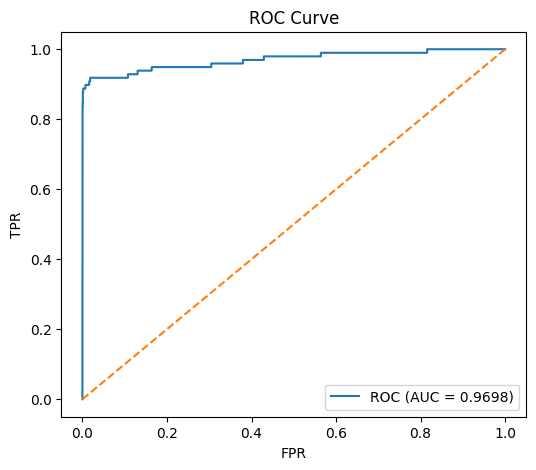

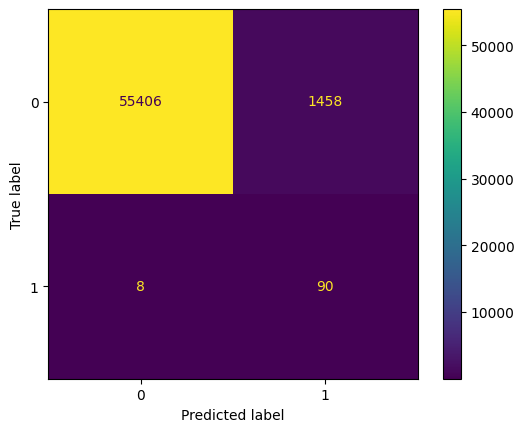

In [ ]:
#  visual evaluation
from sklearn.metrics import precision_recall_curve, roc_curve, auc, ConfusionMatrixDisplay

# ROC curve (for LogReg example)
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'ROC (AUC = {roc_auc:.4f})')
plt.plot([0,1],[0,1],'--')
plt.xlabel('FPR'); plt.ylabel('TPR'); plt.legend(); plt.title('ROC Curve')
plt.show()

# Confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

V1     0.0
V2     0.0
V3     0.0
V4     0.0
V5     0.0
V6     0.0
V7     0.0
V8     0.0
V9     0.0
V10    0.0
V11    0.0
V12    0.0
V13    0.0
V14    0.0
V15    0.0
V16    0.0
V17    0.0
V18    0.0
V19    0.0
V20    0.0
dtype: float64


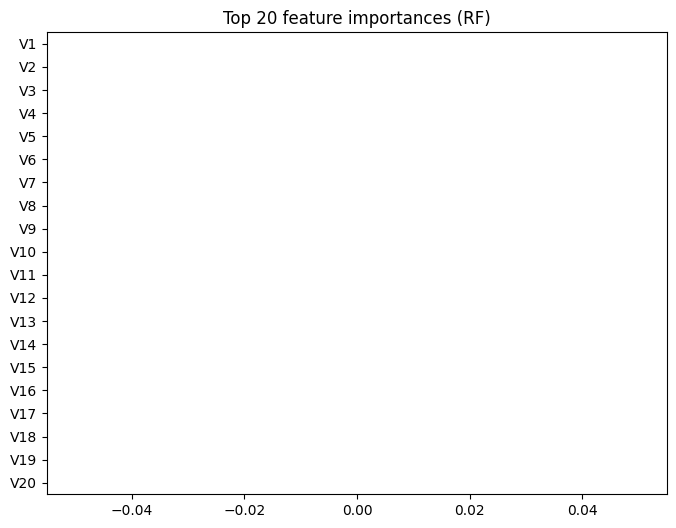

In [ ]:
#  feature importances (for tree models)
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print(importances.head(20))

# simple bar plot
importances.head(20).plot(kind='barh', figsize=(8,6))
plt.gca().invert_yaxis()
plt.title("Top 20 feature importances (RF)")
plt.show()


In [ ]:
# save artifacts
import joblib
joblib.dump(rf, 'rf_fraud_model.joblib')
joblib.dump(scaler, 'amount_time_scaler.joblib')

# Provide download link in Colab
from google.colab import files
files.download('rf_fraud_model.joblib')  # click to download
files.download('amount_time_scaler.joblib')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# example single-record inference
example = X_test.iloc[0:1].copy()
proba = xgb.predict_proba(example)[:,1][0]
print("Predicted fraud probability:", proba)

Predicted fraud probability: 1.7121148e-06
